In [1]:
# Simplified Gradient Descent: OLS, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate synthetic linear data
def generate_data(n_samples=100, n_features=10, sparsity=0.5):
    X = np.random.randn(n_samples, n_features)
    
    true_w = np.random.randn(n_features)
    mask = np.random.rand(n_features) < sparsity
    true_w[mask] = 0  # induce sparsity

    y = X @ true_w + 0.1 * np.random.randn(n_samples)
    return X, y, true_w

# Gradient Descent Solver
def gradient_descent(X, y, lr=0.1, n_iters=500, lambda_=0.1, penalty='none'):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    history = []

    for i in range(n_iters):
        y_pred = X @ w
        error = y_pred - y
        gradient = (1/n_samples) * X.T @ error

        if penalty == 'l2':
            gradient += 2 * lambda_ * w
        elif penalty == 'l1':
            gradient += lambda_ * np.sign(w)

        w -= lr * gradient
        history.append(w.copy())
    
    return w, np.array(history)

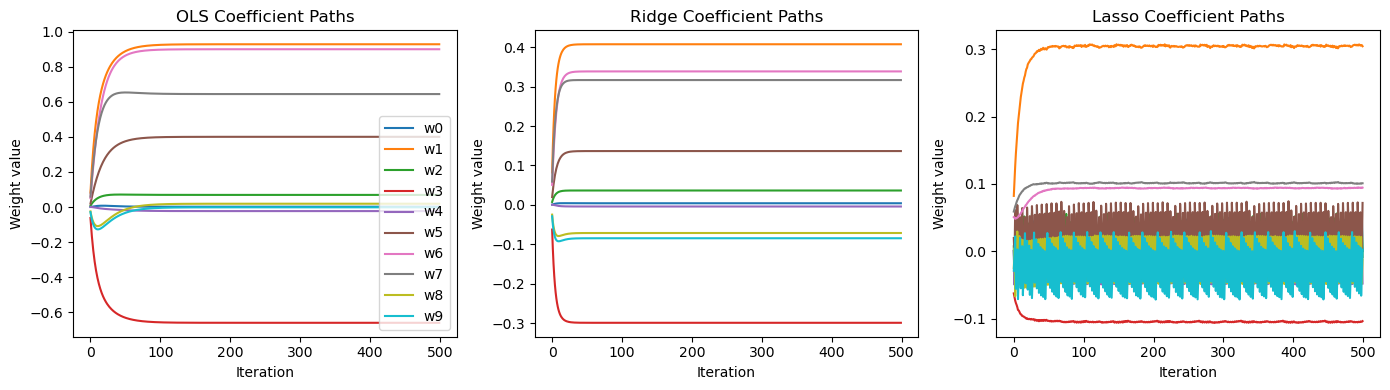

In [2]:
# Run the experiment
X, y, true_w = generate_data()

w_ols, hist_ols = gradient_descent(X, y, penalty='none')
w_ridge, hist_ridge = gradient_descent(X, y, penalty='l2', lambda_=0.5)
w_lasso, hist_lasso = gradient_descent(X, y, penalty='l1', lambda_=0.5)

# Plot coefficient paths
plt.figure(figsize=(14, 4))
for i, (name, hist) in enumerate(zip(['OLS', 'Ridge', 'Lasso'], 
                                     [hist_ols, hist_ridge, hist_lasso])):
    plt.subplot(1, 3, i+1)
    for j in range(hist.shape[1]):
        plt.plot(hist[:, j], label=f'w{j}')
    plt.title(f"{name} Coefficient Paths")
    plt.xlabel("Iteration")
    plt.ylabel("Weight value")
    if i == 0: plt.legend()
plt.tight_layout()
plt.show()

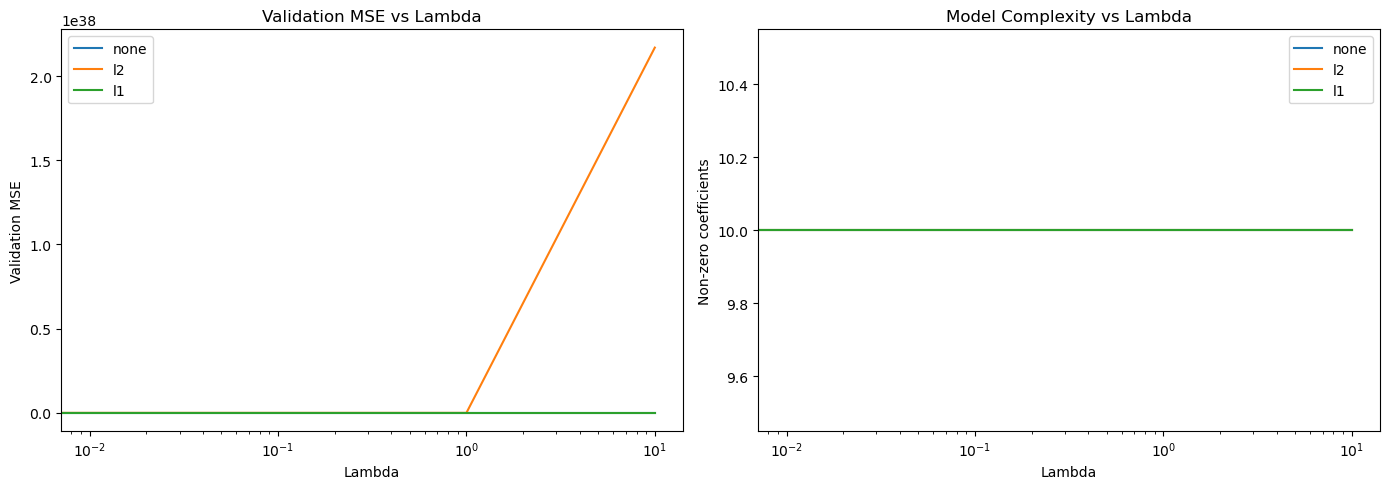

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Generate synthetic linear data
def generate_data(n_samples=100, n_features=10, sparsity=0.5):
    X = np.random.randn(n_samples, n_features)
    
    true_w = np.random.randn(n_features)
    mask = np.random.rand(n_features) < sparsity
    true_w[mask] = 0  # induce sparsity

    y = X @ true_w + 0.1 * np.random.randn(n_samples)
    return X, y, true_w

# Gradient Descent Solver with optional return of weight history
def gradient_descent(X, y, X_val, y_val, lr=0.1, n_iters=300, 
                     lambda_=0.1, penalty='none'):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    train_errors = []
    val_errors = []

    for i in range(n_iters):
        y_pred = X @ w
        error = y_pred - y
        gradient = (1/n_samples) * X.T @ error

        if penalty == 'l2':
            gradient += 2 * lambda_ * w
        elif penalty == 'l1':
            gradient += lambda_ * np.sign(w)

        w -= lr * gradient

        # Track errors
        train_errors.append(mean_squared_error(y, X @ w))
        val_errors.append(mean_squared_error(y_val, X_val @ w))

    return w, train_errors, val_errors

# Run experiment for multiple lambda values
X, y, true_w = generate_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

lambda_values = [0.0, 0.01, 0.1, 1.0, 10.0]
results = {}

for penalty in ['none', 'l2', 'l1']:
    results[penalty] = {'lambdas': [], 'train_mse': [], 'val_mse': [], 'num_nonzero': []}
    for lam in lambda_values:
        w, train_err, val_err = gradient_descent(X_train, y_train, X_val, y_val,
                                                 lambda_=lam, penalty=penalty, lr=0.1)
        results[penalty]['lambdas'].append(lam)
        results[penalty]['train_mse'].append(train_err[-1])
        results[penalty]['val_mse'].append(val_err[-1])
        results[penalty]['num_nonzero'].append(np.sum(np.abs(w) > 1e-4))  # active features

# Plot validation error vs lambda
plt.figure(figsize=(14, 5))

for i, penalty in enumerate(['none', 'l2', 'l1']):
    plt.subplot(1, 2, 1)
    plt.plot(results[penalty]['lambdas'], results[penalty]['val_mse'], label=penalty)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Validation MSE')
    plt.title("Validation MSE vs Lambda")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(results[penalty]['lambdas'], results[penalty]['num_nonzero'], label=penalty)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Non-zero coefficients')
    plt.title("Model Complexity vs Lambda")
    plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for Ridge/Lasso (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X, columns=feature_names).head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
ridge

Ridge(alpha=0.01)

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1, 10, 100]
ridge_results, lasso_results = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)

    ridge.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)

    ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test_scaled))
    lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

    ridge_results.append((alpha, ridge_rmse, ridge.coef_))
    lasso_results.append((alpha, lasso_rmse, lasso.coef_))


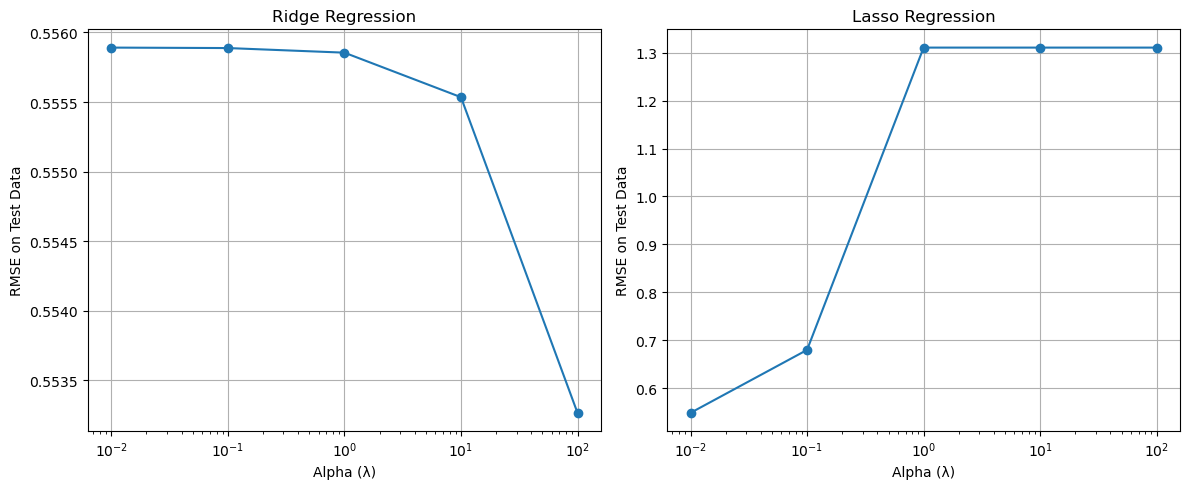

In [17]:
def plot_rmse(results, title):
    alphas = [r[0] for r in results]
    rmses = [r[1] for r in results]
    plt.plot(alphas, rmses, marker='o')
    plt.xscale('log')
    plt.xlabel("Alpha (λ)")
    plt.ylabel("RMSE on Test Data")
    plt.title(title)
    plt.grid(True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_rmse(ridge_results, "Ridge Regression")

plt.subplot(1, 2, 2)
plot_rmse(lasso_results, "Lasso Regression")
plt.tight_layout()
plt.show()


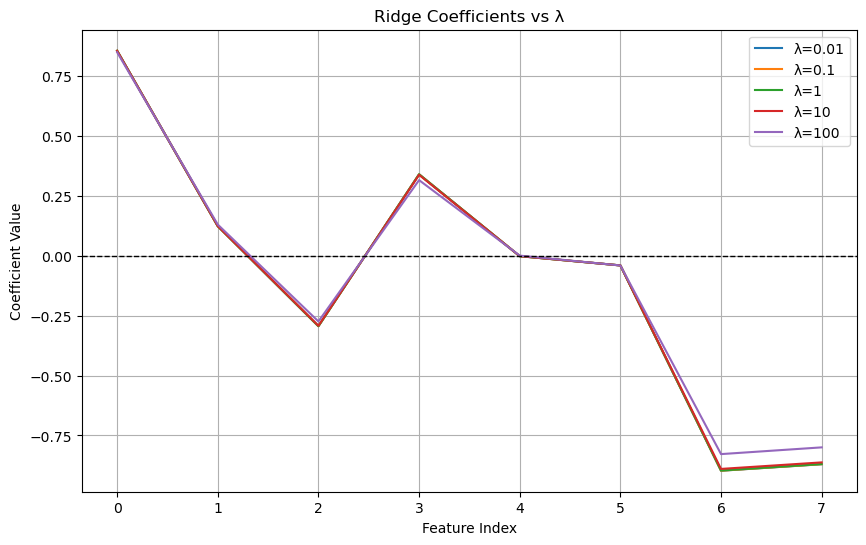

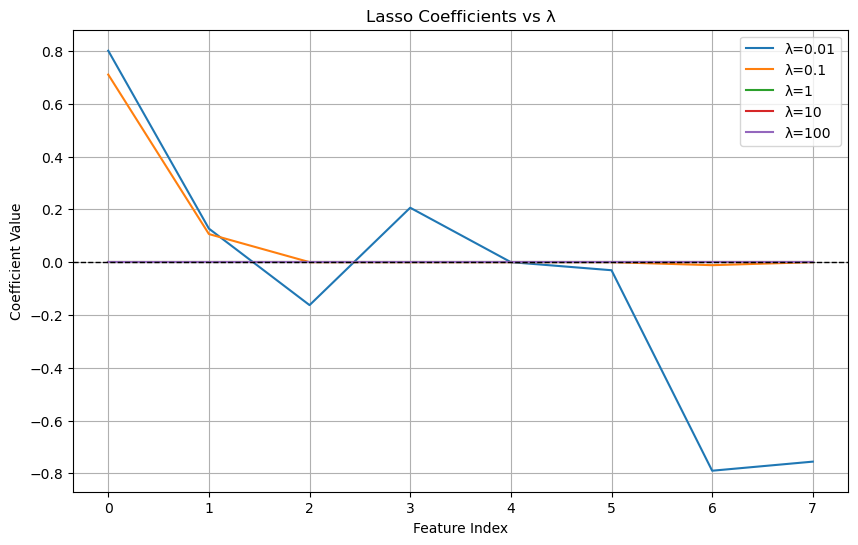

In [18]:
def plot_coeffs(results, model_name):
    plt.figure(figsize=(10, 6))
    for i, (alpha, _, coefs) in enumerate(results):
        plt.plot(coefs, label=f"λ={alpha}")
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f"{model_name} Coefficients vs λ")
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_coeffs(ridge_results, "Ridge")
plot_coeffs(lasso_results, "Lasso")
